In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from scipy import spatial
from scipy.spatial import distance_matrix

In [33]:
#Position des fleurs dans le data frame sur les axes x, y
df=pd.read_csv("abeilles")
position_ruche=pd.DataFrame({"x": [500],"y": [500]})
df=pd.concat([position_ruche, df], ignore_index=True)

In [34]:
df.head()

,x,y
0,500,500
1,796,31
2,774,13
3,116,69
4,908,534


In [58]:
import random
import numpy as np
import matplotlib.pyplot as plt
random.seed(60)# cela fixe de début du random

# Initialiser le parcours des abeilles
nombre_abeilles = 100
nombre_fleurs = 50
parcours_abeilles = []

# Générer les parcours pour chaque abeille
for _ in range(nombre_abeilles):
    parcours = list(range(1, nombre_fleurs + 1))  # Indices des fleurs (à l'exclusion de la ruche)
    np.random.shuffle(parcours)
    parcours = [0] + parcours + [0] # Ajouter la position de la ruche au début
    parcours_abeilles.append(parcours)

# Créer la matrice de distance
A= np.array(df)
B = A.copy()
dist_mat = distance_matrix(A,B, p=1)
matrice = pd.DataFrame(dist_mat)

def calculer_distance_parcours(parcours, matrice_distance):
    fitness_score = 0
    for i in range(len(parcours) - 1):
        fitness_score += matrice_distance[parcours[i]][parcours[i+1]]
        
    # Ajouter la distance de retour à la ruche
    fitness_score += matrice_distance[parcours[-1]][parcours[0]]
    return fitness_score
print(parcours_abeilles[99])

[0, 20, 25, 23, 14, 32, 36, 44, 50, 13, 30, 26, 42, 8, 3, 46, 11, 22, 21, 39, 38, 12, 7, 1, 2, 37, 9, 35, 31, 48, 4, 16, 19, 17, 15, 41, 29, 5, 24, 34, 28, 49, 40, 6, 43, 18, 27, 33, 45, 10, 47, 0]


In [59]:
distances_abeilles = [calculer_distance_parcours(parcours, dist_mat) for parcours in parcours_abeilles]

# Trouver l'index du parcours avec le meilleur fitness
index_meilleur_fitness = np.argmin(distances_abeilles)

# Imprimer le meilleur fitness score et le parcours correspondant
print("Meilleur Fitness Score:", distances_abeilles[index_meilleur_fitness])
print("Parcours correspondant:", parcours_abeilles[index_meilleur_fitness])
index_meilleur_fitness

Meilleur Fitness Score: 28846.0
Parcours correspondant: [0, 25, 33, 9, 41, 35, 4, 36, 28, 10, 21, 14, 18, 13, 43, 6, 2, 24, 23, 50, 27, 34, 46, 19, 37, 16, 1, 8, 45, 12, 42, 40, 22, 11, 38, 44, 26, 17, 15, 30, 47, 29, 39, 20, 32, 5, 3, 31, 49, 48, 7, 0]


16

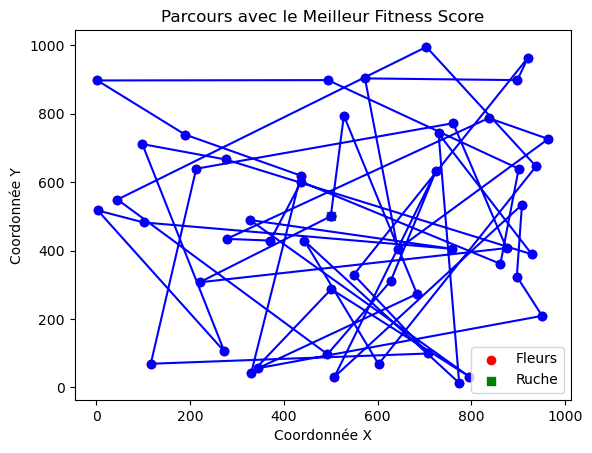

In [60]:
parcours_meilleur_fitness = parcours_abeilles[index_meilleur_fitness]
chemin_meilleur_fitness_x = [df.loc[p]['x'] for p in parcours_meilleur_fitness]
chemin_meilleur_fitness_y = [df.loc[p]['y'] for p in parcours_meilleur_fitness]

# Afficher le parcours avec Matplotlib
plt.plot(chemin_meilleur_fitness_x, chemin_meilleur_fitness_y, marker='o', linestyle='-', color='blue')
plt.scatter(df['x'], df['y'], color='red', marker='o', label='Fleurs')
plt.scatter(df.loc[0]['x'], df.loc[0]['y'], color='green', marker='s', label='Ruche')

plt.title('Parcours avec le Meilleur Fitness Score')
plt.xlabel('Coordonnée X')
plt.ylabel('Coordonnée Y')
plt.legend()
plt.show()

In [61]:
# Afficher les 10 premiers meilleurs fitness score uniques
meilleurs_fitness_uniques = set()
compteur_fitness_affiches = 0

for distance in distances_abeilles:
    if distance not in meilleurs_fitness_uniques:
        meilleurs_fitness_uniques.add(distance)
        compteur_fitness_affiches += 1

    if compteur_fitness_affiches == 50:
        break
# Trier les fitness scores uniques et les afficher
fitness_scores_tries = sorted(list(meilleurs_fitness_uniques))
print("Meilleurs fitness scores uniques en ordre:")
for i, fitness in enumerate(fitness_scores_tries, 1):
    print(f"{i}. Fitness Score:", fitness)


Meilleurs fitness scores uniques en ordre:
1. Fitness Score: 28846.0
2. Fitness Score: 30000.0
3. Fitness Score: 30258.0
4. Fitness Score: 30434.0
5. Fitness Score: 30448.0
6. Fitness Score: 30538.0
7. Fitness Score: 30594.0
8. Fitness Score: 31294.0
9. Fitness Score: 31396.0
10. Fitness Score: 31414.0
11. Fitness Score: 31966.0
12. Fitness Score: 31990.0
13. Fitness Score: 32066.0
14. Fitness Score: 32118.0
15. Fitness Score: 32142.0
16. Fitness Score: 32170.0
17. Fitness Score: 32184.0
18. Fitness Score: 32222.0
19. Fitness Score: 32388.0
20. Fitness Score: 32408.0
21. Fitness Score: 32612.0
22. Fitness Score: 32622.0
23. Fitness Score: 32828.0
24. Fitness Score: 32914.0
25. Fitness Score: 33034.0
26. Fitness Score: 33150.0
27. Fitness Score: 33196.0
28. Fitness Score: 33270.0
29. Fitness Score: 33284.0
30. Fitness Score: 33674.0
31. Fitness Score: 33706.0
32. Fitness Score: 33898.0
33. Fitness Score: 34286.0
34. Fitness Score: 34494.0
35. Fitness Score: 34734.0
36. Fitness Score: 34

In [62]:
# Créer un DataFrame avec l'identifiant de l'abeille et son score fitness
resultats_df = pd.DataFrame({'Abeille': range(1, nombre_abeilles + 1), 'Fitness': distances_abeilles,'parcours':parcours_abeilles})

# Afficher les dix premières lignes du DataFrame
resultats_df.sort_values('Fitness',ascending=True)[:10]

,Abeille,Fitness,parcours
16,17,28846.0,"[0, 25, 33, 9, 41, 35, 4, 36, 28, 10, 21, 14, ..."
94,95,29300.0,"[0, 19, 22, 40, 21, 48, 14, 4, 39, 36, 3, 7, 3..."
72,73,29968.0,"[0, 36, 5, 18, 33, 25, 26, 44, 27, 24, 43, 45,..."
47,48,30000.0,"[0, 36, 8, 24, 12, 9, 34, 39, 43, 18, 41, 5, 1..."
68,69,30060.0,"[0, 44, 28, 2, 24, 8, 26, 35, 1, 11, 9, 50, 16..."
44,45,30258.0,"[0, 25, 15, 34, 44, 30, 4, 6, 18, 49, 1, 39, 4..."
60,61,30372.0,"[0, 21, 39, 7, 1, 8, 41, 5, 18, 6, 33, 29, 11,..."
20,21,30434.0,"[0, 40, 46, 2, 7, 31, 28, 38, 42, 9, 6, 32, 45..."
39,40,30448.0,"[0, 39, 47, 31, 50, 24, 48, 2, 35, 1, 28, 17, ..."
56,57,30452.0,"[0, 24, 42, 16, 29, 39, 14, 22, 43, 45, 36, 2,..."


In [63]:
#Moyenne de ma premiere génération
df2 = resultats_df["Fitness"].mean()

In [64]:
df2

33342.4

In [65]:
random.seed(60)  # Cela fixe le début du random
nombre_abeilles = 100
nombre_fleurs = 50
nombre_generations = 100  # Ajoute de la ligne pour définir le nombre de générations
taux_mutation = 0.05

# Convertir l'ensemble en une liste
liste_meilleurs_fitness_uniques = list(meilleurs_fitness_uniques)

# Sélection des meilleures abeilles
indices_meilleurs_fitness_uniques = sorted(range(len(liste_meilleurs_fitness_uniques)), key=lambda k: liste_meilleurs_fitness_uniques[k], reverse=True)[:int(nombre_abeilles * 0.5)]
meilleures_abeilles = [parcours_abeilles[i] for i in indices_meilleurs_fitness_uniques]

In [66]:
# Fonction croisement parents
def croisement(parent1, parent2):
    point_croisement = random.randint(0, len(parent1) - 1)
    enfant=parent1[:point_croisement] + parent2[point_croisement:]
    
    enfant =list(dict.fromkeys(enfant))
    
    list_fleur=set(list(range(1, len(df))))
    temp = list_fleur.difference(enfant)
    for i in temp:
        position_aleatoire = random.randint(0, len(parcours))
        enfant.insert(position_aleatoire,i)
    return enfant

def generer_nouvelle_generation(meilleures_abeilles, nombre_abeilles, taux_mutation, matrice):
    nouvelle_generation = []

    for _ in range(int(nombre_abeilles * 0.5)):
        # Appliquer croisement entre deux abeilles
        parent1 = random.choice(meilleures_abeilles)
        parent2 = random.choice(meilleures_abeilles)
        enfant = croisement(parent1, parent2)
        nouvelle_generation.append(enfant)
        
    return nouvelle_generation

print("Indice de la meilleure Abeille:")
print(indices_meilleurs_fitness_uniques[:1])

print("Score de la meilleure Abeille:")
print(distances_abeilles[indices_meilleurs_fitness_uniques[0]])

# Afficher la génération des enfants
print("Nombre d'abeilles:")
enfants =generer_nouvelle_generation(meilleures_abeilles, nombre_abeilles, taux_mutation, matrice)
for i in indices_meilleurs_fitness_uniques:
    enfants.append(parcours_abeilles[i])

print(len(enfants))


Indice de la meilleure Abeille:
[30]
Score de la meilleure Abeille:
37232.0
Nombre d'abeilles:
100


In [67]:
meilleures_abeilles

[[0,
  13,
  19,
  29,
  36,
  9,
  37,
  27,
  35,
  24,
  26,
  48,
  12,
  43,
  44,
  34,
  18,
  3,
  41,
  47,
  49,
  4,
  6,
  1,
  20,
  39,
  45,
  15,
  31,
  7,
  33,
  14,
  2,
  50,
  25,
  28,
  40,
  5,
  30,
  23,
  32,
  38,
  8,
  17,
  21,
  46,
  16,
  22,
  42,
  10,
  11,
  0],
 [0,
  9,
  26,
  7,
  33,
  21,
  3,
  48,
  6,
  44,
  16,
  5,
  38,
  13,
  39,
  30,
  24,
  17,
  20,
  47,
  40,
  35,
  32,
  49,
  25,
  36,
  31,
  15,
  23,
  8,
  11,
  43,
  45,
  27,
  10,
  29,
  50,
  1,
  46,
  4,
  34,
  14,
  22,
  18,
  37,
  41,
  2,
  12,
  42,
  28,
  19,
  0],
 [0,
  12,
  18,
  37,
  6,
  43,
  19,
  13,
  26,
  9,
  44,
  15,
  16,
  31,
  22,
  36,
  39,
  8,
  47,
  35,
  7,
  11,
  33,
  5,
  14,
  17,
  21,
  24,
  42,
  20,
  46,
  23,
  29,
  3,
  25,
  48,
  40,
  45,
  28,
  50,
  10,
  1,
  41,
  2,
  38,
  32,
  34,
  30,
  49,
  27,
  4,
  0],
 [0,
  23,
  34,
  2,
  1,
  40,
  14,
  26,
  44,
  32,
  12,
  4,
  39,
  50,
  36,
  30,
  

In [68]:
distances_abeilles[indices_meilleurs_fitness_uniques[0]]

37232.0

In [69]:
indices_meilleurs_fitness_uniques

[30,
 33,
 42,
 15,
 19,
 11,
 7,
 39,
 13,
 22,
 9,
 48,
 12,
 44,
 0,
 20,
 29,
 41,
 38,
 17,
 5,
 3,
 46,
 18,
 49,
 4,
 8,
 27,
 40,
 37,
 10,
 2,
 35,
 26,
 16,
 6,
 45,
 31,
 47,
 34,
 25,
 14,
 28,
 1,
 32,
 43,
 36,
 24,
 23,
 21]

In [70]:
print(meilleures_abeilles)

[[0, 13, 19, 29, 36, 9, 37, 27, 35, 24, 26, 48, 12, 43, 44, 34, 18, 3, 41, 47, 49, 4, 6, 1, 20, 39, 45, 15, 31, 7, 33, 14, 2, 50, 25, 28, 40, 5, 30, 23, 32, 38, 8, 17, 21, 46, 16, 22, 42, 10, 11, 0], [0, 9, 26, 7, 33, 21, 3, 48, 6, 44, 16, 5, 38, 13, 39, 30, 24, 17, 20, 47, 40, 35, 32, 49, 25, 36, 31, 15, 23, 8, 11, 43, 45, 27, 10, 29, 50, 1, 46, 4, 34, 14, 22, 18, 37, 41, 2, 12, 42, 28, 19, 0], [0, 12, 18, 37, 6, 43, 19, 13, 26, 9, 44, 15, 16, 31, 22, 36, 39, 8, 47, 35, 7, 11, 33, 5, 14, 17, 21, 24, 42, 20, 46, 23, 29, 3, 25, 48, 40, 45, 28, 50, 10, 1, 41, 2, 38, 32, 34, 30, 49, 27, 4, 0], [0, 23, 34, 2, 1, 40, 14, 26, 44, 32, 12, 4, 39, 50, 36, 30, 6, 42, 17, 18, 33, 13, 37, 35, 49, 47, 3, 25, 27, 16, 19, 15, 48, 24, 29, 22, 9, 20, 5, 43, 45, 38, 8, 21, 11, 41, 10, 28, 46, 7, 31, 0], [0, 4, 29, 44, 39, 22, 41, 37, 15, 26, 10, 18, 43, 8, 45, 50, 13, 32, 20, 31, 49, 42, 40, 21, 6, 48, 38, 16, 17, 46, 1, 11, 24, 34, 3, 19, 2, 23, 27, 47, 33, 25, 5, 9, 30, 14, 28, 35, 36, 12, 7, 0], [0, 

In [71]:
# Fonction nouvelle génération
def generer_nouvelle_generation(meilleures_abeilles, nombre_abeilles, taux_mutation, matrice):
    nouvelle_generation = []

    for _ in range(int(nombre_abeilles * 0.5)):
        # Appliquer croisement entre deux abeilles
        parent1 = random.choice(meilleures_abeilles)
        parent2 = random.choice(meilleures_abeilles)
        enfant = croisement(parent1, parent2)
        nouvelle_generation.append(enfant)

    return nouvelle_generation

# Boucle pour plusieurs générations
nombre_generations = 500  # Remplacez par le nombre de générations souhaité

# Initialiser des listes pour stocker les données du graphique
meilleur_fitness_par_generation = []
moyenne_fitness_par_generation = []

# Liste pour stocker toutes les moyennes de fitness de toutes les générations
toutes_les_moyennes_fitness = []

for generation in range(nombre_generations):
    # Afficher la génération des enfants
    enfants = generer_nouvelle_generation(meilleures_abeilles, nombre_abeilles, taux_mutation, matrice)

    # Calculer la moyenne des fitness de la génération actuelle
    moyenne_fitness_generation = np.mean([calculer_distance_parcours(parcours, matrice) for parcours in enfants])
    moyenne_fitness_par_generation.append(moyenne_fitness_generation)

    # Mettre à jour les meilleures abeilles pour la génération suivante
    meilleures_abeilles = enfants

    # Ajouter toutes les moyennes de la génération actuelle à la liste
    toutes_les_moyennes_fitness.extend([calculer_distance_parcours(parcours, matrice) for parcours in enfants])

# Imprimer la liste de toutes les moyennes
print(toutes_les_moyennes_fitness)


[35606.0, 37968.0, 37624.0, 31576.0, 31450.0, 32698.0, 35984.0, 33374.0, 36212.0, 30618.0, 32800.0, 37016.0, 35230.0, 34882.0, 35382.0, 31344.0, 34042.0, 36530.0, 35546.0, 32332.0, 33846.0, 33836.0, 33666.0, 32650.0, 34244.0, 35492.0, 33270.0, 32408.0, 31200.0, 31996.0, 36966.0, 28172.0, 31022.0, 32308.0, 36648.0, 33962.0, 35058.0, 36292.0, 36322.0, 34442.0, 31996.0, 33004.0, 33230.0, 33156.0, 33940.0, 33332.0, 34750.0, 35986.0, 32276.0, 36202.0, 32858.0, 37624.0, 36510.0, 34134.0, 29668.0, 34340.0, 31180.0, 34412.0, 32254.0, 29786.0, 31996.0, 31016.0, 33740.0, 36798.0, 35976.0, 33030.0, 33548.0, 38064.0, 37226.0, 32276.0, 29562.0, 33846.0, 35228.0, 36414.0, 32478.0, 36192.0, 29664.0, 32866.0, 32758.0, 34262.0, 34326.0, 31916.0, 33770.0, 34688.0, 32722.0, 35176.0, 33062.0, 28434.0, 34882.0, 31344.0, 35768.0, 35192.0, 34094.0, 28936.0, 36104.0, 33100.0, 33266.0, 28586.0, 35794.0, 36242.0, 35328.0, 31344.0, 33740.0, 34636.0, 36064.0, 31390.0, 35486.0, 33988.0, 31924.0, 32266.0, 31350.0, 

In [72]:
moyenne_fitness_par_generation

[33997.72,
 33542.16,
 33463.56,
 33323.04,
 33242.64,
 33297.2,
 33211.04,
 33541.92,
 34235.64,
 34405.16,
 34149.56,
 33803.64,
 34392.08,
 34620.84,
 34376.92,
 33654.76,
 33456.08,
 32897.32,
 32846.32,
 32620.72,
 32926.92,
 32455.04,
 32091.96,
 32784.68,
 33029.88,
 33032.4,
 32849.36,
 32971.76,
 32853.72,
 32511.36,
 32261.96,
 32708.92,
 32977.68,
 33239.6,
 33682.04,
 33438.36,
 33838.92,
 33404.64,
 34008.24,
 34056.12,
 33856.16,
 33612.96,
 33556.12,
 33551.32,
 33356.6,
 33302.4,
 33374.12,
 33423.32,
 33734.96,
 33487.84,
 33448.92,
 33238.6,
 33103.68,
 32605.16,
 32767.36,
 33163.24,
 32781.56,
 32743.48,
 33458.4,
 33688.36,
 34044.64,
 34254.52,
 34043.4,
 34039.72,
 33967.96,
 34043.8,
 33961.84,
 33848.92,
 33996.88,
 33928.56,
 33731.96,
 33450.36,
 33628.0,
 33862.72,
 33734.16,
 34148.4,
 34519.12,
 34135.68,
 33681.2,
 33168.96,
 33524.76,
 33945.92,
 33790.88,
 33737.32,
 34015.12,
 33670.48,
 33908.16,
 33766.32,
 33651.96,
 33653.68,
 33666.56,
 33402.68,


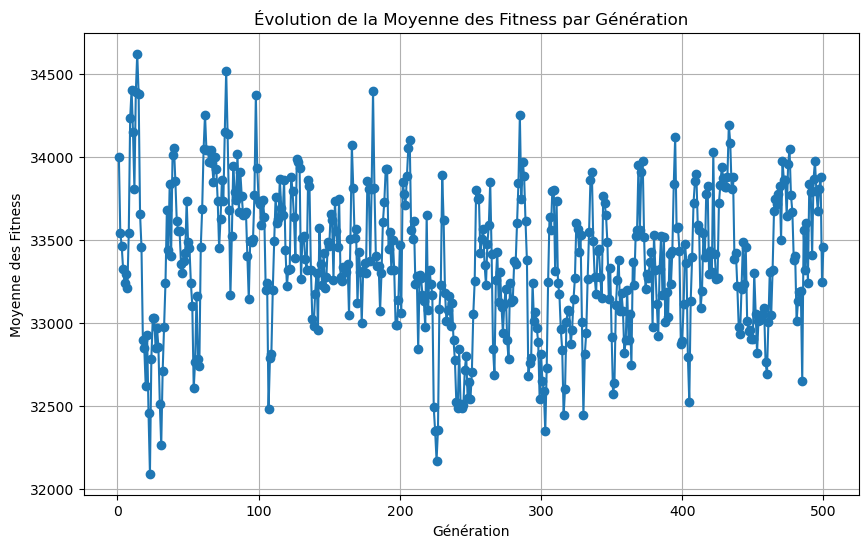

In [73]:
# Tracer le graphique de l'évolution de la moyenne des fitness par génération
plt.figure(figsize=(10, 6))
plt.plot(range(1, nombre_generations + 1), moyenne_fitness_par_generation, marker='o', linestyle='-')
plt.title('Évolution de la Moyenne des Fitness par Génération')
plt.xlabel('Génération')
plt.ylabel('Moyenne des Fitness')
plt.grid(True)
plt.show()

In [74]:
moyenne_fitness_generation

33456.32

In [75]:
sum(distances_abeilles)/len(distances_abeilles)

33342.4

In [76]:
def muter(parcours):
    # Créer une copie du parcours
    parcours_mutant = parcours.copy()

    # Je selectionne deux positions aléatoires dans le parcours
    position1, position2 = np.random.choice(range(1, len(parcours)), 2, replace=False)

    # J'echange les éléments aux positions sélectionnées
    parcours_mutant[position1], parcours_mutant[position2] = parcours_mutant[position2], parcours_mutant[position1]

    return parcours_mutant

# Fonction nouvelle génération avec mutation
def generer_nouvelle_generation(meilleures_abeilles, nombre_abeilles, taux_mutation, matrice):
    nouvelle_generation = []

    for _ in range(int(nombre_abeilles * 0.5)):
        # J'applique le croisement entre deux abeilles
        parent1 = random.choice(meilleures_abeilles)
        parent2 = random.choice(meilleures_abeilles)
        enfant = croisement(parent1, parent2)
        
        # J'applique la mutation avec une certaine probabilité
        if random.random() < taux_mutation:
            enfant = muter(enfant)
            
        nouvelle_generation.append(enfant)

    return nouvelle_generation

# Test de la fonction de génération de nouvelle génération avec mutation
nombre_abeilles = 100
taux_mutation = 0.1
matrice = matrice

nouvelle_generation = generer_nouvelle_generation(meilleures_abeilles, nombre_abeilles, taux_mutation, matrice)

# Trier les moyennes de fitness de la plus élevée à la plus basse
#nouvelle_generation_triees = sorted(nouvelle_generation, reverse=True)

print("Nouvelle Génération avec Mutation :", nouvelle_generation)


Nouvelle Génération avec Mutation : [[38, 44, 34, 26, 29, 20, 22, 18, 21, 40, 36, 15, 19, 1, 9, 28, 42, 50, 48, 30, 31, 43, 13, 4, 27, 41, 39, 10, 49, 17, 3, 35, 8, 45, 16, 24, 37, 46, 11, 2, 33, 47, 5, 25, 14, 12, 6, 23, 7, 32], [38, 44, 34, 26, 29, 20, 22, 18, 21, 40, 36, 15, 9, 32, 24, 1, 19, 28, 42, 50, 48, 30, 31, 43, 13, 7, 4, 27, 41, 39, 10, 49, 17, 3, 35, 8, 45, 23, 16, 37, 46, 11, 2, 47, 33, 25, 14, 12, 6, 5], [40, 1, 42, 46, 10, 50, 49, 18, 45, 47, 36, 17, 20, 6, 27, 39, 28, 23, 13, 41, 22, 34, 30, 31, 16, 15, 14, 11, 12, 38, 21, 19, 35, 3, 24, 25, 26, 44, 7, 2, 32, 9, 43, 33, 29, 37, 5, 4, 48, 8], [19, 20, 23, 18, 35, 48, 8, 37, 49, 10, 14, 26, 4, 22, 11, 7, 42, 39, 47, 2, 34, 21, 41, 16, 44, 1, 45, 12, 13, 46, 43, 29, 17, 40, 28, 31, 36, 30, 9, 3, 50, 24, 38, 15, 25, 32, 33, 27, 6, 5], [4, 20, 28, 31, 36, 18, 45, 32, 15, 8, 9, 7, 22, 11, 30, 48, 39, 47, 2, 10, 21, 41, 16, 37, 1, 46, 23, 3, 43, 29, 17, 19, 13, 40, 33, 25, 14, 35, 12, 6, 42, 38, 5, 50, 44, 34, 49, 24, 26, 27]

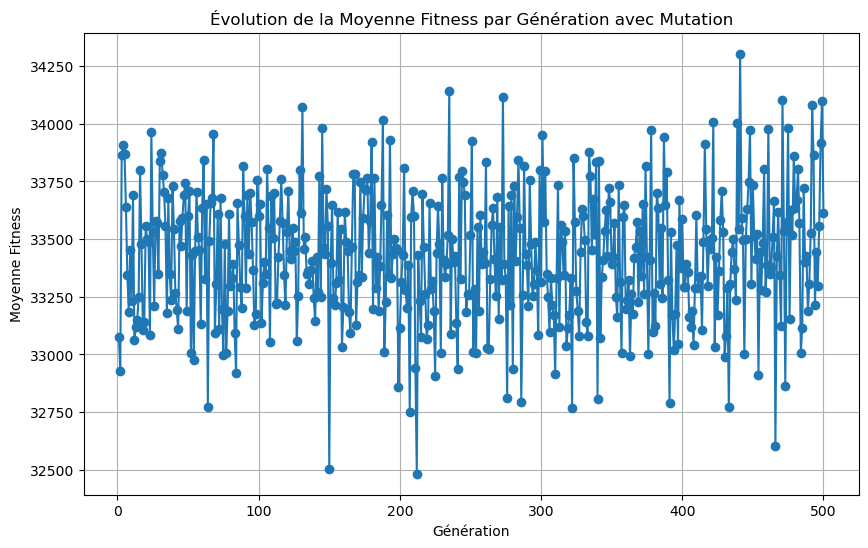

In [77]:
# Initialiser des listes pour stocker les données du graphique
meilleur_fitness_par_generation = []
moyenne_fitness_par_generation = []

# Liste pour stocker toutes les moyennes de fitness de toutes les générations
toutes_les_moyennes_fitness = []
taux_mutation = 0.4

for generation in range(nombre_generations):
    enfants = generer_nouvelle_generation(meilleures_abeilles, nombre_abeilles, taux_mutation, matrice)
    
    moyenne_fitness_generation = np.mean([calculer_distance_parcours(parcours, matrice) for parcours in enfants])
    #moyenne_fitness_par_generation.append(moyenne_fitness_generation)
    
    toutes_les_moyennes_fitness.append(moyenne_fitness_generation)

# Trier les moyennes de fitness de la plus élevée à la plus basse
toutes_les_moyennes_fitness_triees = sorted(toutes_les_moyennes_fitness, reverse=True)

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.plot(range(1, nombre_generations + 1), toutes_les_moyennes_fitness, marker='o', linestyle='-')
plt.title('Évolution de la Moyenne Fitness par Génération avec Mutation')
plt.xlabel('Génération')
plt.ylabel('Moyenne Fitness')
plt.grid(True)
plt.show()